Sample 1: Accuracy = 0.9814814814814815
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------
Sample 2: Accuracy = 0.9074074074074074
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------
Sample 3: Accuracy = 0.8888888888888888
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_sh

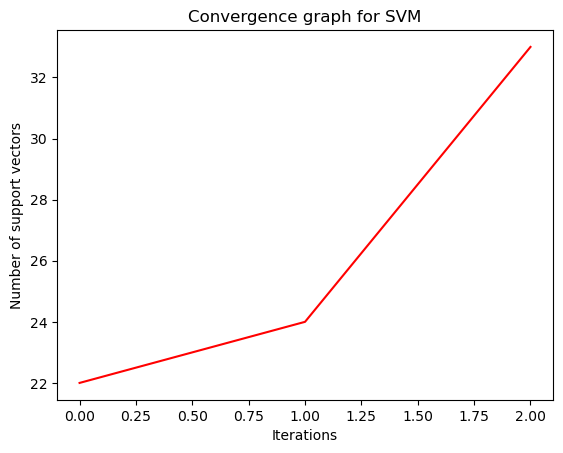

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=143).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=144).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=145).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=146).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=147).

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=276).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=277).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=278).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=279).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=280).

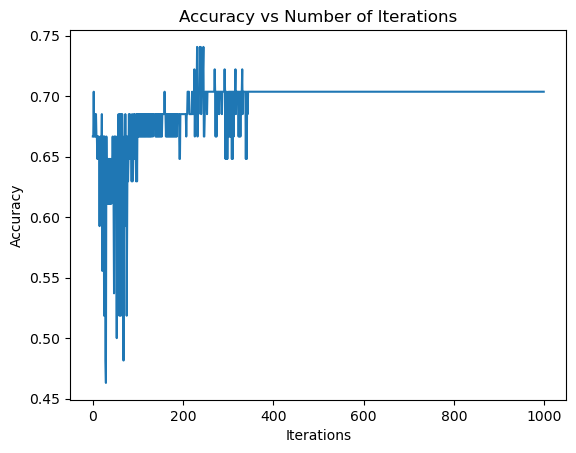

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import NuSVC
import matplotlib.pyplot as plt

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Divide the dataset into 70-30 for training and testing with 10 different samples
n_samples = 10
test_size = 0.3
random_state = 42
accuracies = []

for i in range(n_samples):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    random_state += 1

    # Create the SVM model object
    model = NuSVC(max_iter=1000)

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict the target values for the test set using the trained model
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Sample {i + 1}: Accuracy = {accuracy}")
    print("Best parameters: ", model.get_params())
    print("-" * 80)

# Find the sample with maximum accuracy
max_accuracy_index = np.argmax(accuracies)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    random_state=max_accuracy_index + random_state)
model = NuSVC(kernel='rbf', nu=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Plot the convergence graph for the sample whose accuracy is maximum
plt.plot(model.n_support_, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Number of support vectors')
plt.title('Convergence graph for SVM')
plt.show()

# Plot the graph of accuracy vs number of iterations
y_pred = model.predict(X_test)
accuracies = []
n_support = []
for i in range(1, 1001):
    model = NuSVC(kernel='rbf', nu=0.5, max_iter=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    n_support.append(model.n_support_.sum())
    accuracies.append(accuracy)

plt.plot(accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Iterations')
plt.show()